<a href="https://www.kaggle.com/code/sharanharsoor/custom-model-building-in-tensorflow-keras?scriptVersionId=141527796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction.

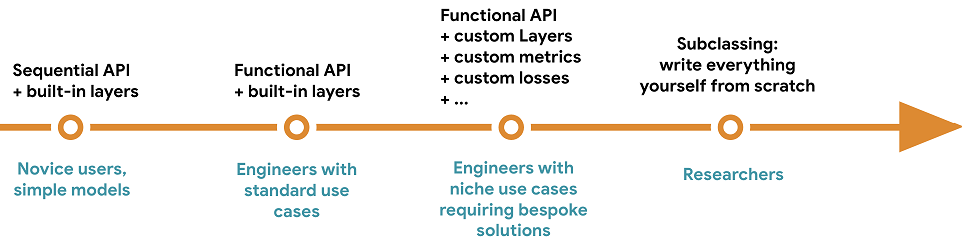 <br>
[Image](https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-7/v-5/16) 


The TensorFlow framework accommodates the creation of models spanning a spectrum from straightforward to intricate architectures. In the realm of deep learning, practitioners may possess diverse backgrounds and experience levels. TensorFlow recognizes this diversity and offers various approaches, catering to both beginners and seasoned individuals.

One such approach is tf.keras, which represents TensorFlow's implementation of the Keras API specification. Keras has evolved into a high-level interface for constructing and training models in TensorFlow versions 2.0 and beyond.

These approaches include:

* Sequential API
* Functional API
* Model Subclassing

In [1]:
import os
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers, Model 
from tensorflow.keras.datasets import mnist 
from keras.utils import plot_model 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Sequential API: 
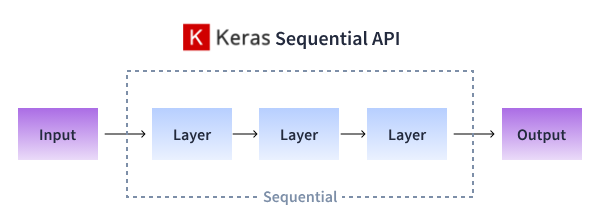 <br>
[image](https://www.dataquest.io/blog/tutorial-introduction-to-keras/)

In the Sequential API, neural network layers are organized in a linear, sequential manner, with data flowing through them in a single direction. This approach is widely adopted for crafting straightforward neural network architectures, where layers are stacked one after another.

It's an ideal starting point for beginners due to its user-friendly nature, allowing you to construct models by connecting building blocks in a straightforward manner. However, one limitation of the Sequential API is its restriction to creating Keras models with only one input tensor and one output tensor, making it unsuitable for more complex architectures with multiple inputs or outputs.

In [2]:
model =  keras.Sequential( [
                  layers.Dense(16, activation="relu", name="layer1"),
                  layers.Dense(8, activation="relu", name="layer2"), 
                  layers.Dense(4, name="layer3") ] )

In [3]:
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", name="layer1"))
model.add(layers.Dense(8, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

# Sequential API drawbacks:
The Sequential API in Keras is a simple and easy-to-use way to create neural networks, but it does come with some drawbacks:
1. Limited Model Architectures: The Sequential API is designed for linear, sequential models where layers are stacked on top of each other in a single, straight path. This restricts its ability to create more complex network architectures, such as multi-branch models or models with shared layers.

2. Inflexibility: The Sequential API doesn't provide the flexibility to reuse layers easily. Once you've added a layer to the model, you can't easily connect it to multiple parts of the network or reuse it in different ways within the same model. The Functional API is better suited for such scenarios.

3. Limited Access to Intermediate Layers: In some advanced use cases, you might want to access intermediate layers or their outputs for various purposes like feature extraction or implementing custom loss functions. The Sequential API doesn't make this as straightforward as the Functional API, where you can easily access intermediate outputs.

4. Complex Models are Challenging: As your models become more complex, you might find it challenging to express them using only the Sequential API. If you need to implement intricate skip connections, shared layers, or models with multiple inputs and outputs, you will need to resort to the Functional API or Subclassing API, which offer greater flexibility.

5. Debugging and Visualization: Debugging complex models or visualizing the architecture can be more difficult with the Sequential API compared to the Functional API, where you have a clear, explicit graph of the model. This can be especially challenging when dealing with models that have branches or skip connections.

In summary, while the Sequential API is excellent for simple, feedforward neural networks, it can be limiting for more complex and customized model architectures. In such cases, the Functional API or Subclassing API in Keras provides more flexibility and control.

# Functional API: 
<div>
<img src =https://www.oreilly.com/api/v2/epubs/9781789136364/files/graphics/B10354_05_09.jpg width = "500" height = "400" <br>
</div>
[image] (https://www.oreilly.com/library/view/machine-learning-for/9781789136364/ch05s12.html)  <br>
<br>
This approach empowers you to construct neural network models featuring multiple inputs and outputs, as well as the capability to incorporate shared layers. It not only encompasses all the functionality of the sequential API but also offers enhanced control over how layers interact with one another. The Functional API adopts a Lego-like concept, where components can be assembled to construct a framework for your final model. Think of these components as Lego bricks that can be arranged and stacked in various configurations to define your model's architecture. Once these components are created, they can be reused multiple times, providing the advantage of reusability.






In [4]:
def CNN_block(x,filters, kernel_size=3):
    # Defining a function which returns an operation of Convolution, BatchNormalisation and Relu.
    # Here x is the input.
    x = layers.Conv2D(filters, kernel_size=3)(x)
    x = layers.BatchNormalization()(x)

    return tf.nn.relu(x)

In [5]:
def inception_block(x, filter1, filter2):
    # Defining a function which applies two CNN blocks. The output of both these blocks are then concatenated
    conv1 = CNN_block(x, filter1)
    conv2 = CNN_block(x, filter2)
    x = keras.layers.concatenate([conv1, conv2])

    return x

In this context, the inception_block leverages the functionality of two branches from the CNN_block. These outputs originating from these dual branches are subsequently merged by employing two instances of the CNN_block, arranged as a list and processed through the layers.concatenate layer.

This capability is referred to as Shared Layers, wherein the same block is employed within a new block or Lego-like structure. By sharing information across multiple inputs, shared layers enable you to train a model effectively even when you have limited data.

Now that all the necessary building blocks for the model have been defined, you can proceed to construct its architecture.

In [6]:
inputs = keras.Input(shape=(28, 28, 1))
x = CNN_block(inputs,32)
x = layers.MaxPooling2D(3)(x)
x = inception_block(x,32, 32)
x = inception_block(x,64, 64)
x = CNN_block(x,128)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs, outputs, name="final_model")
model.summary()


Model: "final_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 26, 26, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 tf.nn.relu (TFOpLambda)        (None, 26, 26, 32)   0           ['batch_normalization[0

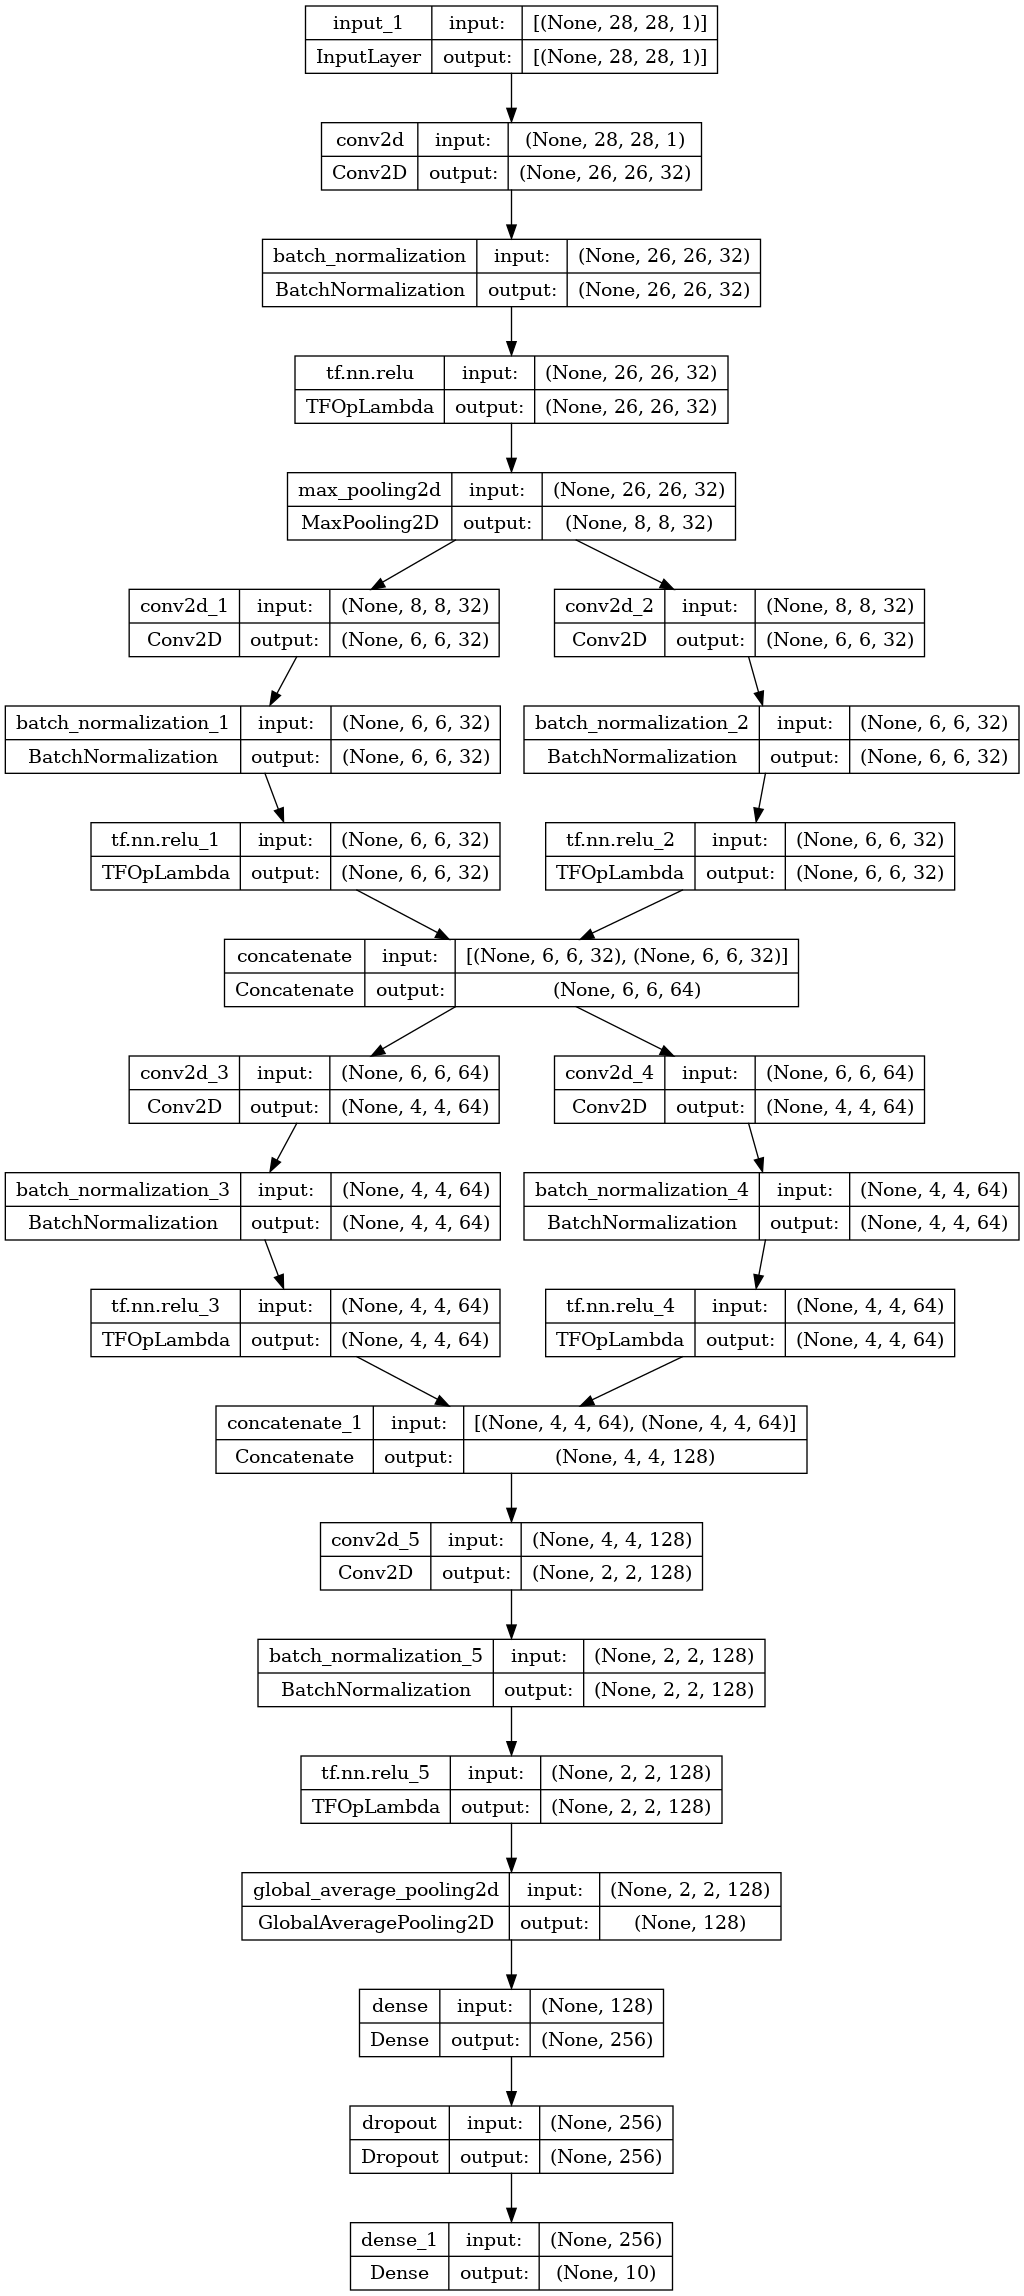

In [7]:
keras.utils.plot_model(model, "final_model.png", show_shapes=True)

The Functional API effectively bridges the gap by enabling the creation of more intricate models. This approach facilitates the incorporation of multiple inputs and outputs, the utilization of shared layers, the implementation of branching structures, and the promotion of reusability. However, within this approach, operations are performed on pre-existing built-in layers. The Keras API offers a wide array of these built-in layers, including but not limited to:

* Convolutional layers: Conv1D, Conv2D, etc.
* Pooling layers: MaxPooling1D, MaxPooling2D, etc.
* Recurrent layers: GRU, LSTM, etc.
* BatchNormalization, Dropout, Embedding, and many others.

However, if you prefer not to use the predefined built-in layers and desire the flexibility to design your custom layers, then the third approach—Model Subclassing—offers an elegant and tailored solution.

# Model Subclassing: 
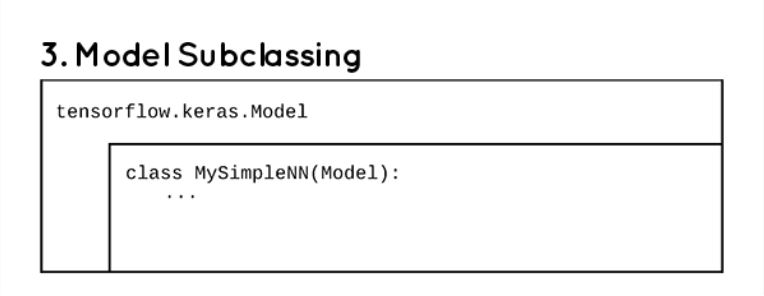 <br>
[image](https://velog.io/@lighthouse97/Tensorflow%EB%A1%9C-%EB%AA%A8%EB%8D%B8%EC%9D%84-%EB%A7%8C%EB%93%9C%EB%8A%94-3%EA%B0%80%EC%A7%80-%EB%B0%A9%EB%B2%95)  <br>
Model Subclassing is designed for experienced developers seeking full control and customization over the functionality and behavior of their models, layers, and training processes.


TensorFlow Model Subclassing is an advanced technique for creating custom neural network architectures in TensorFlow, a popular deep learning framework. With Model Subclassing, instead of using pre-defined layers and models provided by TensorFlow's high-level APIs like Keras, you define your own custom layers and models by subclassing TensorFlow's tf.keras.Model class.

Here's a basic overview of how Model Subclassing works:

* Create Custom Layers: You define your custom layers by subclassing tf.keras.layers.Layer. Inside the layer's call method, you specify how the layer should transform input data. This gives you complete control over the layer's behavior.

* Define Custom Models: You create custom models by subclassing tf.keras.Model. In the model's __init__ method, you instantiate your custom layers, specifying the architecture of your neural network. In the call method, you define the forward pass of your model, specifying how data flows through the layers.

* Custom Training Loops: With Model Subclassing, you have the flexibility to implement custom training loops. This means you can define how your model computes gradients, applies optimization algorithms, and updates its weights during training.



In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

11490434/11490434 [==============================] - 0s 0us/step


# Building Custom Models

The call method inside the Model actually originates from the keras.engine.layer._Layer class and is inherited by the Model class.

Our intention is to override this inherited call method with our own custom call method.

That's why there's no need to explicitly use model.call(). When we invoke our model instance, the inherited call method is automatically executed, which in turn calls our custom call method.

In [9]:
class MyModel1(keras.Model):  # model.fit, model.evalute, model.predict
    def __init__(self, num_classes=10):
        super().__init__()
        self.dense1 = layers.Dense(64)
        self.dense2 = layers.Dense(num_classes)

    def call(self, x):
        x = tf.nn.relu(self.dense1(x))
        return self.dense2(x)

In [10]:
sub_model = MyModel1()

In [11]:
# below line will show an error : AttributeError: 'MyModel1' object has no attribute 'model'

#sub_model.model().summary()

# let's fix the error below

Both the Sequential and Functional APIs construct a layered graph structure by stacking layers sequentially. When you specify the input_shape for the first layer, these approaches can automatically deduce the shapes of subsequent layers. Consequently, you can easily display the input and output shapes using model.summary().

On the contrary, model subclassing is implemented through a custom class, which is only invoked through the call method. In this approach, there is no predefined graph structure for layers, making it challenging to discern how various layers interact since these interactions are defined within the class body.

Hence, in the subclassing approach, you cannot deduce the input and output shapes until you've tested the model with actual data. This is why running the model with data and then using model.summary() doesn't result in errors.

In [12]:
class MyModel2(keras.Model):  # model.fit, model.evalute, model.predict
    def __init__(self, num_classes=10):
        super().__init__()
        self.dense1 = layers.Dense(64)
        self.dense2 = layers.Dense(num_classes)

    def call(self, x):
        x = tf.nn.relu(self.dense1(x))
        return self.dense2(x)

    def model(self):
        x=keras.Input(shape=(28*28))
        return Model(inputs=[x],outputs=self.call(x))

In [13]:
sub_model = MyModel2()

In [14]:
sub_model.model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 tf.nn.relu_6 (TFOpLambda)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
sub_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"])


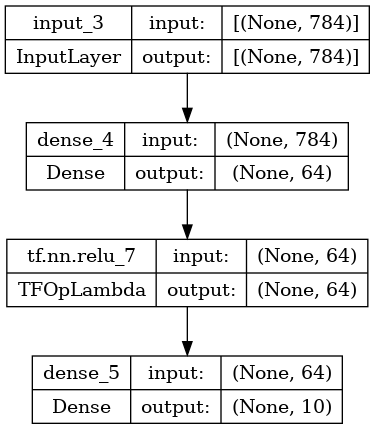

In [16]:
plot_model(sub_model.model(), to_file='sub_model.png',show_shapes=True)

In [17]:
sub_model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=1)

sub_model.evaluate(x_test,y_test,batch_size=32,verbose=1)


Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.3017 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1427 - accuracy: 0.9590
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1034 - accuracy: 0.9693
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0817 - accuracy: 0.9752
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9746


[0.08845137059688568, 0.9746000170707703]

# Building Custom Layers
In TensorFlow, if you desire to create custom layers, such as your own dense layer, or if you intend to craft unique activation functions like softmax or ReLU, you have the freedom to do so.

Typically, when developing machine learning models, you would use the provided built-in layers, which are designed to address conventional tasks efficiently. However, if your objective is to work at a lower level, manipulating individual operations and variables rather than relying on a higher level of abstraction, you can achieve this by creating classes that inherit from the tf.keras.Layer class. This approach liberates you from being solely dependent on the pre-existing layers offered by the Keras API.

Let's explore how the concept of subclassing empowers you to construct novel and custom layers.

In Keras, a fundamental building block is the Layer class. A layer comprises two essential components: a state, which encompasses the layer's "weights," and a transformation that maps inputs to outputs, often referred to as a "call" representing the layer's forward pass.

For instance, consider a densely-connected layer. Within this layer, there exists a state, specifically the variables 'w' and 'b.'

In [18]:
class custom_dense(keras.layers.Layer):
    def __init__(self, units, input_dim):
        super().__init__()
        self.w = self.add_weight(    # specifying this is a weight and trainable.
            name="w",
            shape=(input_dim, units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            name="b", shape=(units,), initializer="zeros", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

The _init_() defines all the instances of the custom layers that will be utilised in building the model. Once all the instances are defined, you can create the call() method which overrides how the computation should happen between the instances & other layers.

In [19]:
class MyReLU(keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def call(self, x):
        return tf.math.maximum(x, 0)

In [20]:
class MyModel(keras.Model):  # model.fit, model.evalute, model.predict
    def __init__(self, num_classes=10):
        super().__init__()
        self.dense1 = custom_dense(64,784)
        self.dense2 = custom_dense(num_classes,64)
        self.relu = MyReLU()

    def call(self, x):
        x = self.relu(self.dense1(x))
        return self.dense2(x)
    
    def model(self):
        x = keras.Input(shape=(28*28))
        return Model(inputs=[x],outputs=self.call(x))

In [21]:
fin_model = MyModel()

fin_model.model().summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 custom_dense (custom_dense)  (None, 64)               50240     
                                                                 
 my_re_lu (MyReLU)           (None, 64)                0         
                                                                 
 custom_dense_1 (custom_dens  (None, 10)               650       
 e)                                                              
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
fin_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

fin_model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1)
fin_model.evaluate(x_test, y_test, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3540 - accuracy: 0.9035
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1687 - accuracy: 0.9510
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1172 - accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0912 - accuracy: 0.9727
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0975 - accuracy: 0.9700


[0.09753679484128952, 0.9700000286102295]

# Building Datasets
Custom datasets in TensorFlow serve several important purposes:

* Data Integration
* Data Preparation
* Data Augmentation
* Complex Input Pipelines
* Non-Standard Data Formats
* Custom Data Sources
* Specialized Data Tasks
* Research and Experimentation

In summary, custom datasets in TensorFlow offer the flexibility and customization required to work with a wide range of data sources, formats, and machine learning tasks, making them a fundamental component of TensorFlow workflows.


When working with image-based models, the typical workflow involves gathering data from memory, applying essential preprocessing and transformations to each image, and then randomly selecting batches of these images for training the model.

Likewise, for text-based models, the process entails extracting meaningful information from raw data, cleaning and converting them into tokens, implementing necessary preprocessing steps, and grouping them into batches suitable for training text models.

The TensorFlow tf.data API is a valuable tool for constructing and managing intricate input pipelines. It empowers you to efficiently handle extensive datasets and perform intricate data transformations.

To illustrate this process, let's create a dataset using the tf.data API with the MNIST dataset as an example.

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train=tf.expand_dims(x_train, -1)
x_test=tf.expand_dims(x_test, -1)
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


* The tf.data API provides the tf.data.Dataset.prefetch transformation. It can be used to decouple the time when data is produced from the time when data is consumed.'
* The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step.
* You could either manually tune this value, or set it to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=len(y_train)).batch(32,drop_remainder=True).prefetch(buffer_size=AUTOTUNE))

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = (test_dataset.batch(32,drop_remainder=False).prefetch(buffer_size=AUTOTUNE))

In [25]:
print(train_dataset)
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(32, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(32,), dtype=tf.uint8, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>


The input pipeline starts from importing the data and creating a dataset from the data stored in the memory. For this, you can use tf.data.Dataset.from_tensor_slices(), which creates a tf.data.Dataset the object whose elements are slices of the passed tensors. Once you have created the object, you can transform it by applying different operations to the dataset object. (for example, Dataset.map() orDataset.batch()). 
 

Once we have created the dataset and applied different operations on it.


In [26]:
class custom_CNN(keras.layers.Layer):
    def __init__(self, filters, kernel_size=3):
        super().__init__()
        self.conv = layers.Conv2D(filters, kernel_size, padding="same")
        self.bn = layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv(input_tensor)
        x = self.bn(x, training=training)
        x = tf.nn.relu(x)
        return x
    
    def model(self):
        x = keras.Input()
        return keras.Model(inputs=[x], outputs=self.call(x))


In [27]:
cus_model = keras.Sequential(
    [keras.Input(shape=(28, 28, 1)),
     custom_CNN(32), 
     custom_CNN(64), 
     custom_CNN(128), 
     layers.Flatten(), 
     layers.Dense(10),]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_cnn (custom_CNN)     (None, 28, 28, 32)        448       
                                                                 
 custom_cnn_1 (custom_CNN)   (None, 28, 28, 64)        18752     
                                                                 
 custom_cnn_2 (custom_CNN)   (None, 28, 28, 128)       74368     
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 10)                1003530   
                                                                 
Total params: 1,097,098
Trainable params: 1,096,650
Non-trainable params: 448
_________________________________________________________________
None


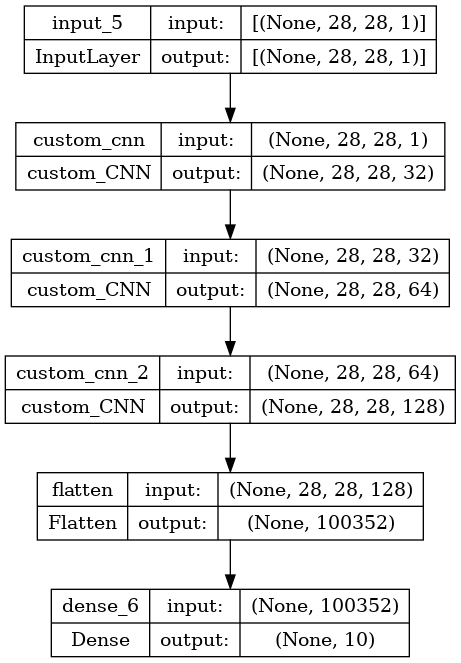

In [28]:
print(cus_model.summary())

plot_model(cus_model, to_file='cus_model.png',show_shapes=True)

You can pass a Dataset instance directly to the methods fit(), evaluate(), and predict():

In [29]:
cus_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

cus_model.fit(train_dataset, batch_size=32, epochs=5, verbose=1) # no need to pass the data and label seperate.
cus_model.evaluate(test_dataset, batch_size=32, verbose=1)


Epoch 1/5
1875/1875 [==============================] - 21s 7ms/step - loss: 0.4826 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0411 - accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0411 - accuracy: 0.9877


[0.04108590632677078, 0.9876999855041504]

Once you have built the dataset, the rest of the process remains the same as you have done while building your custom layers & models. 



Important Note: All three modeling approaches—Sequential, Functional, and Subclassed models—can seamlessly interact with each other. This means that within your Subclassed model, you have the flexibility to incorporate a Sequential or Functional model to define the architecture of your neural network.

# Creating a Custom Training Loop:
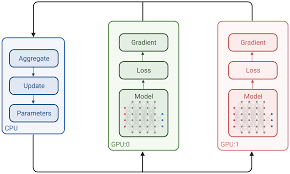 <br>
[image](https://towardsdatascience.com/multi-gpus-and-custom-training-loops-in-tensorflow-2-15b4b86b53bd) <br>
The most intriguing aspect of model training lies in crafting a custom training loop. While the fit() method offers a seamless training experience, it's essential to understand the inner workings.

Beneath the surface of the fit() method lies the backpropagation process, where your model's parameters are optimized to capture the relationship between input data and target values. This process can be distilled into these fundamental steps:

Obtain predictions from your model.
* Compute the loss by comparing these predictions to the target values.
* Conduct error backpropagation by tracking gradients in your computations.
* Apply these gradients to your model's parameters using an optimizer.

TensorFlow equips us with the GradientTape() functionality, enabling meticulous monitoring of operations and facilitating gradient computation, thereby providing precise control over every detail of the training process.

example of Gradient Tape <br>
tf.GradientTape --> Record operations for automatic differentiation.

In [30]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


For automatic differentiation, TensorFlow must maintain a record of the sequence of operations during the forward pass. During the subsequent backward pass, TensorFlow traverses this operation list in reverse order to compute gradients.

* In the context of eager execution, TensorFlow computes tensor values as they are encountered in code. Consequently, it does not precompute a static graph that relies on input placeholders.

* Therefore, to propagate errors backward, you must manually track the gradients of your computations and subsequently apply these gradients to an optimizer.

* If you've created a custom layer, you have precise control over the operations within that layer, including the computation of gradients and the accumulation of loss.

The Gradient Tape feature grants direct access to individual gradients within the layer. Once you've recorded relevant operations, you can use GradientTape.gradient(target, sources) to compute the gradient of a specific target (typically a loss) with respect to specific sources (often the model's variables).

In [31]:
cus_model = keras.Sequential(
    [keras.Input(shape=(28, 28, 1)),
     custom_CNN(32), 
     custom_CNN(64), 
     custom_CNN(128), 
     layers.Flatten(), 
     layers.Dense(10),]
)

Just as you've harnessed the capabilities of tf.keras.Model and tf.keras.layers.Layer for crafting your custom model and layers, you similarly want to leverage the convenient features offered by the fit() method. This method empowers you to retain control over fine-grained details and each operation while preserving a high-level abstraction and simplicity.

In the process of customizing the fit() method, you need to override the train_step function within your Model class, akin to how we've overridden the call() method to customize the forward pass.

The train_step function is automatically invoked when you apply the fit() method to your model. Consequently, this approach seamlessly integrates customization within the framework of the fit() method.

In essence, you can succinctly summarize the entire custom training procedure in these steps:

* Create a new class by subclassing keras.Model.
* Override the train_step(self, data) method.
* Return a dictionary containing metric names along with their respective values.

In [32]:
class Custom_fit(keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def compile(self, optimizer, loss, metric):
    super(Custom_fit, self).compile()
    self.optimizer = optimizer
    self.loss = loss
    self.metric = metric

  def train_step(self,data):
    # Unpack the data
    x, y = data
    with tf.GradientTape() as tape:
      # Compute predictions
      y_pred = self.model(x, training=True)
      # Calculating loss
      loss = self.loss(y, y_pred)
    
    # Tracking gradients
    training_vars = self.trainable_variables
    gradients = tape.gradient(loss, training_vars)

    #Update optimizer & metrics
    self.optimizer.apply_gradients(zip(gradients, training_vars))
    self.metric.update_state(y, y_pred)

    return {"Train_loss for Custom_train": loss, "Train_accuracy for Custom_train": self.metric.result()}


  def test_step(self, data):
    # Unpack the data
    x, y = data
    # Compute predictions
    y_pred = self.model(x, training=False)
    # Calculating loss
    loss = self.loss(y, y_pred)
    #Update optimizer & metrics
    self.metric.update_state(y, y_pred)
    return {"Test_loss for Custom_test": loss, "Test_accuracy for Custom_test": self.metric.result()}

In [33]:
cus_train = Custom_fit(cus_model)
cus_train.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metric = keras.metrics.SparseCategoricalAccuracy(name="accuracy")
)

cus_train.fit(train_dataset, batch_size=32, epochs=5)
cus_train.evaluate(test_dataset, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 16s 7ms/step - Train_loss for Custom_train: 0.2777 - Train_accuracy for Custom_train: 0.9153
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - Train_loss for Custom_train: 0.0999 - Train_accuracy for Custom_train: 0.9796
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - Train_loss for Custom_train: 0.0589 - Train_accuracy for Custom_train: 0.9863
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - Train_loss for Custom_train: 0.0335 - Train_accuracy for Custom_train: 0.9914
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - Test_loss for Custom_test: 0.0869 - Test_accuracy for Custom_test: 0.9747


[0.9789999723434448, 3.142739660688676e-05]

# Summary : 
In summary, you've made significant progress in customizing your layers, models, and training functions through Model subclassing. Key takeaways include:

* TensorFlow's tf.keras offers a wide range of built-in layers, including convolutional, pooling, RNN, and common layers like BatchNormalization, Dropout, and Embedding.

* If these built-in layers don't meet your specific needs, you have the flexibility to extend the API by crafting your own custom layers. All custom layers should inherit from the Layer class and implement the call method, which specifies the layer's computation, as well as the build method for creating layer weights (although this can also be done in the __init__ method).

* The overarching entity for training and serialization is a Model. A Model, akin to a Layer, includes additional functionalities tailored for training.
<br>

## Thank you